In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
parse = lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M')
data = pd.read_csv('HollinHill-weather15-20-verif.csv',
                  parse_dates = True, index_col=0, date_parser=parse,
                  low_memory = False)

In [3]:
data.head()

,LWIN,LWOUT,SWIN,SWOUT,RN,PRECIP,PA,TA,WS,WD,...,G2,TDT1_TSOIL,TDT1_VWC,TDT2_TSOIL,TDT2_VWC,STP_TSOIL2,STP_TSOIL5,STP_TSOIL10,STP_TSOIL20,STP_TSOIL50
DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,326.1,336.6,-0.550,-0.063,-10.987,0.0,1015.0,4.883,4.7942,179.1582,...,-5.16,5.43,-9999.00,5.46,-9999.00,5.03,5.16,5.39,5.90,7.29
2015-01-01 00:30:00,296.0,334.4,-1.899,0.415,-40.714,0.0,1014.0,4.993,4.1182,182.9812,...,-4.11,5.50,38.60,5.50,51.40,4.95,5.09,5.35,5.90,7.28
2015-01-01 01:00:00,296.7,337.9,-1.663,0.596,-43.459,0.0,1014.0,5.830,6.4765,201.9202,...,-3.83,5.48,38.43,5.53,51.34,5.08,5.19,5.41,5.90,7.28
2015-01-01 01:30:00,322.1,341.6,-0.860,0.218,-20.578,0.0,1014.0,6.376,6.3643,204.0332,...,-3.25,5.48,-9999.00,5.53,51.40,5.11,5.22,5.43,5.91,7.27
2015-01-01 02:00:00,323.1,345.3,-1.016,0.162,-23.378,0.0,1014.0,7.271,6.7857,205.0324,...,-1.90,5.53,39.11,5.57,51.34,5.16,5.25,5.45,5.92,7.28


In [4]:
np.isnan(data).sum()

 LWIN                  0
 LWOUT                 0
 SWIN                  0
 SWOUT                 0
 RN                    0
 PRECIP                0
 PA                    0
 TA                    0
 WS                    0
 WD                    0
 ROUND(Q2)             0
 RH                    0
 SNOWD_DISTANCE_COR    0
 UX                    0
 UY                    0
 UZ                    0
 G1                    0
 G2                    0
 TDT1_TSOIL            0
 TDT1_VWC              0
 TDT2_TSOIL            0
 TDT2_VWC              0
 STP_TSOIL2            0
 STP_TSOIL5            0
 STP_TSOIL10           0
 STP_TSOIL20           0
 STP_TSOIL50           0
dtype: int64

In [5]:
upsampled = data.resample('D').mean()

In [6]:
upsampled

,LWIN,LWOUT,SWIN,SWOUT,RN,PRECIP,PA,TA,WS,WD,...,G2,TDT1_TSOIL,TDT1_VWC,TDT2_TSOIL,TDT2_VWC,STP_TSOIL2,STP_TSOIL5,STP_TSOIL10,STP_TSOIL20,STP_TSOIL50
DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2015-01-01,351.520833,359.433333,9.765625,2.062437,-0.209312,0.003542,1007.250000,9.702479,6.983910,203.532454,...,7.210833,6.252500,-379.618125,6.301042,-158.006458,6.321667,6.203125,6.126667,6.237917,7.247083
2015-01-02,271.737500,338.641667,36.396125,19.045375,-49.553417,0.001875,1012.104167,6.266000,3.865075,252.795644,...,-4.590625,7.148125,38.377292,7.193333,51.345833,6.877083,6.977083,7.058958,7.122292,7.470000
2015-01-03,281.939583,326.052083,13.455688,-202.154125,-36.815187,0.000000,1012.562500,3.646875,2.558577,235.957967,...,-9.235833,6.426875,38.219167,6.504375,51.286042,5.919167,6.116458,6.381458,6.808542,7.595417
2015-01-04,248.260417,310.470833,37.642646,20.473604,-45.041375,0.000000,1022.666667,0.068521,1.512956,194.499558,...,-13.279167,5.632917,-4144.047292,5.659375,-2461.356667,4.640208,4.978333,5.455833,6.220208,7.470000
2015-01-05,316.712500,335.100000,24.637479,8.209458,-1.959479,0.000000,1015.729167,4.276646,2.100592,198.264042,...,-3.989167,5.668125,-4562.260417,5.682917,-2461.336458,5.175625,5.287083,5.491875,5.962708,7.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,282.970833,334.997917,48.878604,17.725208,-20.873688,0.000000,985.966598,4.593292,3.547250,190.233375,...,-6.656572,6.081250,37.619375,6.121042,41.077083,5.306229,5.487792,5.810562,6.262375,6.967021
2020-01-28,288.316667,329.272917,39.484042,13.294833,-14.767042,0.000000,980.201806,3.352417,2.779083,226.402114,...,-8.562657,5.764167,37.599167,5.796875,41.040833,4.748604,5.011500,5.424563,5.988750,6.886813
2020-01-29,301.797917,338.631250,29.034437,8.262146,-16.061042,0.000000,991.776496,5.771354,3.513896,238.899685,...,-5.704693,5.462708,37.604375,5.444583,41.027083,4.725979,4.875021,5.165625,5.671187,6.739062


In [9]:
upsampled.to_csv('cleanedweatherstation.csv')

In [11]:
dw = pd.read_csv('cleanedweatherstation.csv', parse_dates = True, index_col = 'DATE_TIME', low_memory = False)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

TypeError: 'AxesSubplot' object is not subscriptable

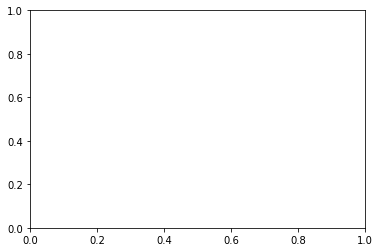

In [21]:
fig, axs = plt.subplots()
#sns.regplot(dw[dw.columns[-1]])
#sns.regplot(x='RN', y='PRECIP')
sns.boxplot(x='RN',y='PRECIP', data1=dw, ax=axs[2])

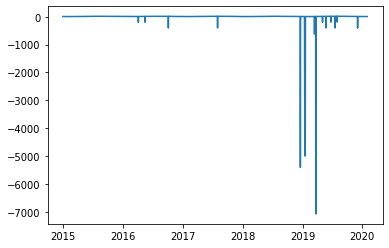

In [12]:
fig,ax=plt.subplots()
ax.plot(dw[dw.columns[-1]])

In [13]:
upsampled.shape

(1857, 27)

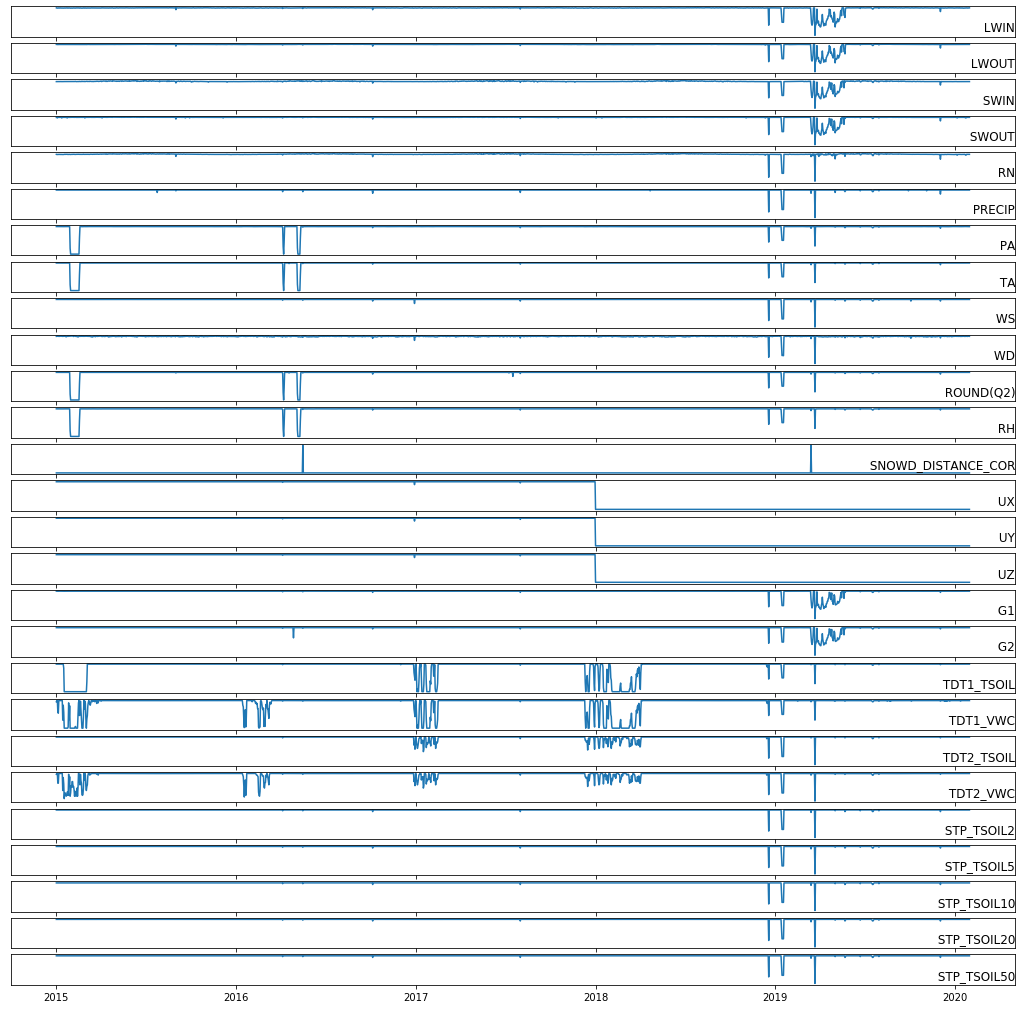

In [16]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(dw.columns)):
    plt.subplot(len(dw.columns), 1, i+1)
    name = dw.columns[i]
    plt.plot(dw[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()